In [338]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as datetime
%matplotlib inline
import matplotlib.pyplot as plt


import re  # regex
from sklearn import set_config
set_config(display="diagram")

from bs4 import BeautifulSoup

import nltk
import nltk.corpus
from nltk.corpus import stopwords

#nltk.download()

from nltk.tokenize import word_tokenize
#from nltk import word_tokenize
nltk.download('punkt')

import string
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

from wordcloud import WordCloud, STOPWORDS
import collections

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
plt.style.use('default')
import squarify

import plotly.express as px


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\godwi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\godwi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [339]:
# dler = nltk.downloader.Downloader()
# dler._update_index()
# dler.download('all')

In [340]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [341]:
df = pd.read_csv("../web_scrap_database/user_handle.csv")
df.shape

(2001, 5)

In [342]:
pd.set_option('display.max_columns', None)
df.head()

,user,Date Created,Number of Likes,Source of Tweet,Tweet
0,renoomokri,2022-08-17 20:03:49+00:00,454,Twitter for iPhone,I thought a certain set of people said Obasanj...
1,renoomokri,2022-08-17 19:30:23+00:00,85,Twitter for iPhone,"Congratulations to my bosom friend, Mallam Bab..."
2,renoomokri,2022-08-17 18:46:37+00:00,233,Twitter for iPhone,When the poor exclusively hang out with only o...
3,renoomokri,2022-08-17 15:54:44+00:00,104,Twitter for iPhone,Breaking: Another Fresh Video Evidence of Tinu...
4,renoomokri,2022-08-17 15:37:10+00:00,373,Twitter for iPhone,"If you walk beside elephants, you wont need um..."


In [343]:
df.dtypes

user               object
Date Created       object
Number of Likes     int64
Source of Tweet    object
Tweet              object
dtype: object

In [344]:
df['Date Created'] = pd.to_datetime(df['Date Created'])

In [345]:
df['year'] = pd.DatetimeIndex(df['Date Created']).year.astype('str')
df['month'] = pd.DatetimeIndex(df['Date Created']).month.astype('str')
df['day'] = pd.DatetimeIndex(df['Date Created']).day.astype('str')

df['date'] =  df['year'] + '-' + df['month'] + '-' + df['day']
df['date'] = pd.to_datetime(df['date'])
df = df.iloc[:,[0,3,4,8]]

In [346]:
df.head()

,user,Source of Tweet,Tweet,date
0,renoomokri,Twitter for iPhone,I thought a certain set of people said Obasanj...,2022-08-17
1,renoomokri,Twitter for iPhone,"Congratulations to my bosom friend, Mallam Bab...",2022-08-17
2,renoomokri,Twitter for iPhone,When the poor exclusively hang out with only o...,2022-08-17
3,renoomokri,Twitter for iPhone,Breaking: Another Fresh Video Evidence of Tinu...,2022-08-17
4,renoomokri,Twitter for iPhone,"If you walk beside elephants, you wont need um...",2022-08-17


In [347]:
# date from may to date
df = df[df.date >= '2022-05-01'].sort_values('date')
df


,user,Source of Tweet,Tweet,date
2000,renoomokri,Twitter for iPhone,People do not realise how difficult it is to w...,2022-06-12
1995,renoomokri,Twitter for iPhone,"Dear @Askofsidiz,\n\nEnemies? That is how you ...",2022-06-12
1996,renoomokri,Twitter for iPhone,This is all shades of wrong! Atiku worked ALL ...,2022-06-12
1999,renoomokri,Twitter for iPhone,"Disaster At Sea, God Just Saved 2 People From ...",2022-06-12
1998,renoomokri,Twitter for iPhone,"Breaking: Bakare Reacts To APC Primary Defeat,...",2022-06-12
...,...,...,...,...
19,renoomokri,Twitter for iPhone,Men who are prepared to kneel before a woman t...,2022-08-17
20,renoomokri,Twitter for iPhone,"You stopped expressing joy and happiness, beca...",2022-08-17
21,renoomokri,Twitter for iPhone,You were on God’s wake up list. Rejoice. If th...,2022-08-17
11,renoomokri,Twitter for iPhone,Identify your God given purpose and stick to i...,2022-08-17


In [348]:
# # #cleaning the tweets  tHIS ONE REMOVES or strips THE dupliate twitter hash tags e.g @ john @ timi, retains emorji , but makes space \n

# def remove_pattern(input_txt, pattern):
#     r = re.findall(pattern, input_txt)
#     for i in r:
#         input_txt = re.sub(i, '', input_txt)        
#     return input_txt
# def clean_tweets(tweets):
#     #remove twitter Return handles (RT @xxx:)
#     tweets = np.vectorize(remove_pattern)(tweets, "RT @[\w]*:") 
    
#     #remove twitter handles (@xxx)
#     tweets = np.vectorize(remove_pattern)(tweets, "@[\w]*")
    
#     #remove URL links (httpxxx)
#     tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")
    
#     #remove special characters, numbers, punctuations (except for #)
#     tweets = np.core.defchararray.replace(tweets, "[^a-zA-Z]", " ")
    
#     #remove new line
#     tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")
    
#     return tweets


# df['tweet_clean(prep)'] = df.Tweet.apply(lambda x :clean_tweets(x) )
# df

In [349]:
# # stopword remover and preprocessing  channges emorji to lol also strip multiple hash tags

# stopwords = set(stopwords.words("english"))
# def clean_tweet(tweet):
#     if type(tweet) == np.float:
#         return ""
#     temp = tweet.lower()
#     temp = re.sub("'", "", temp) # to avoid removing contractions in english
#     temp = re.sub("@[A-Za-z0-9_]+","", temp)
#     temp = re.sub("#[A-Za-z0-9_]+","", temp)
#     temp = re.sub(r'http\S+', '', temp)
#     temp = re.sub('[()!?]', ' ', temp)
#     temp = re.sub('\[.*?\]',' ', temp)
#     temp = re.sub("[^a-z0-9]"," ", temp)
#     temp = temp.split()
#     temp = [w for w in temp if not w in stopwords]
#     temp = " ".join(word for word in temp)
#     return temp
# df['tweet_preprocessed'] = df.Tweet.apply(lambda x :clean_tweet(x) )
# df

In [350]:
# # removes only @ from hash tags and converts emoji to lol

def clean_lemmatize_token(tweet):
    stop_words = set(stopwords.words('english'))
    
    cleaned = tweet.translate(str.maketrans('', '', string.punctuation)).lower()
    tokenized = word_tokenize(cleaned)
    filtered = [w for w in tokenized if not w in stop_words]
    lemmatizer = WordNetLemmatizer()
    lemmatized = []
    for word in filtered:
        lemmatized.append(lemmatizer.lemmatize(word))
    to_remove = ['rt','mention','sxsw','link',"RT @[\w]*:"]
    lemmatized = [w for w in lemmatized if w not in to_remove]
    lemmatized = ' '.join(lemmatized)
    return lemmatized

df['tweet_clean(prep)'] = df.Tweet.apply(lambda x :clean_lemmatize_token(x) )
df


,user,Source of Tweet,Tweet,date,tweet_clean(prep)
2000,renoomokri,Twitter for iPhone,People do not realise how difficult it is to w...,2022-06-12,people realise difficult work tinubu governor ...
1995,renoomokri,Twitter for iPhone,"Dear @Askofsidiz,\n\nEnemies? That is how you ...",2022-06-12,dear askofsidiz enemy see support presidential...
1996,renoomokri,Twitter for iPhone,This is all shades of wrong! Atiku worked ALL ...,2022-06-12,shade wrong atiku worked life civil servant so...
1999,renoomokri,Twitter for iPhone,"Disaster At Sea, God Just Saved 2 People From ...",2022-06-12,disaster sea god saved 2 people drowning https...
1998,renoomokri,Twitter for iPhone,"Breaking: Bakare Reacts To APC Primary Defeat,...",2022-06-12,breaking bakare reacts apc primary defeat say ...
...,...,...,...,...,...
19,renoomokri,Twitter for iPhone,Men who are prepared to kneel before a woman t...,2022-08-17,men prepared kneel woman propose kneel god gav...
20,renoomokri,Twitter for iPhone,"You stopped expressing joy and happiness, beca...",2022-08-17,stopped expressing joy happiness heard alpha m...
21,renoomokri,Twitter for iPhone,You were on God’s wake up list. Rejoice. If th...,2022-08-17,god ’ wake list rejoice good thing happens tod...
11,renoomokri,Twitter for iPhone,Identify your God given purpose and stick to i...,2022-08-17,identify god given purpose stick fad come powe...


In [351]:
#Use with TFIDF 

# from nltk.tokenize import WordPunctTokenizer
# tok = WordPunctTokenizer()
# # pat1 = r'@[A-Za-z0-9]+'
# # pat2 = r'https?://[A-Za-z0-9./]+'
# # combined_pat = r'|'.join((pat1, pat2))

# def tweet_cleaner(text):
#     # soup = BeautifulSoup(text, 'lxml')
#     # souped = soup.get_text()
#     # stripped = re.sub(combined_pat, '', souped)
#     # try:
#     #     clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
#     # except:
#     #     clean = stripped
#     # letters_only = re.sub("[^a-zA-Z]", " ", clean)
#     # lower_case = letters_only.lower()
#     # During the letters_only process two lines above, it has created unnecessay white spaces,
#     # I will tokenize and join together to remove unneccessary white spaces
#     words = tok.tokenize(lower_case)
#     return (" ".join(words)).strip()

In [352]:
#Use with TFIDF 
# # Tokenization
# tk = word_tokenize
# df['Tweet'].apply(tk)

In [353]:
#Use with TFIDF 
# stop_words = set(stopwords.words('english'))

# def cleaning_stopwords(text):
#     return " ".join([word for word in str(text).split() if word not in stop_words])

# df['tweet_stopword'] = df['Tweet'].apply(lambda x:cleaning_stopwords(x) )
# df.head()

In [354]:
# import nltk
# st = nltk.PorterStemmer()
# def stemming_on_text(data):
#     text = [st.stem(word) for word in data]
#     return data
# df['tweet_clean(stemmer)']= df['Tweet'].apply(lambda x: stemming_on_text(x))
# df['tweet_clean(stemmer)']

In [355]:
df.loc[:,['Tweet','tweet_clean(prep)']]

,Tweet,tweet_clean(prep)
2000,People do not realise how difficult it is to w...,people realise difficult work tinubu governor ...
1995,"Dear @Askofsidiz,\n\nEnemies? That is how you ...",dear askofsidiz enemy see support presidential...
1996,This is all shades of wrong! Atiku worked ALL ...,shade wrong atiku worked life civil servant so...
1999,"Disaster At Sea, God Just Saved 2 People From ...",disaster sea god saved 2 people drowning https...
1998,"Breaking: Bakare Reacts To APC Primary Defeat,...",breaking bakare reacts apc primary defeat say ...
...,...,...
19,Men who are prepared to kneel before a woman t...,men prepared kneel woman propose kneel god gav...
20,"You stopped expressing joy and happiness, beca...",stopped expressing joy happiness heard alpha m...
21,You were on God’s wake up list. Rejoice. If th...,god ’ wake list rejoice good thing happens tod...
11,Identify your God given purpose and stick to i...,identify god given purpose stick fad come powe...


# VADER FOR SENTIMENT

In [356]:
sentiments = SentimentIntensityAnalyzer()
df['Positive'] = df['tweet_clean(prep)'].apply(lambda x: sentiments.polarity_scores(x)['pos'])
df['Negetive'] = df['tweet_clean(prep)'].apply(lambda x: sentiments.polarity_scores(x)['neu'])
df['Neutral'] = df['tweet_clean(prep)'].apply(lambda x: sentiments.polarity_scores(x)['neg'])
df['compound'] = df['tweet_clean(prep)'].apply(lambda x: sentiments.polarity_scores(x)['compound'])

In [357]:
score = df.compound.values
sentiment = []
for i in score:
    if i >=0.05 :
        sentiment.append('positive')
    elif i <= -0.05:
        sentiment.append('negative')
    else:
        sentiment.append('neutral')

In [358]:
[i for i in enumerate( df.columns)]

[(0, 'user'),
 (1, 'Source of Tweet'),
 (2, 'Tweet'),
 (3, 'date'),
 (4, 'tweet_clean(prep)'),
 (5, 'Positive'),
 (6, 'Negetive'),
 (7, 'Neutral'),
 (8, 'compound')]

In [359]:
df['sentiment']= sentiment

In [360]:
df['sentiment'] = sentiment
tweet_final = df.loc[:,['tweet_clean(prep)','sentiment']]
tweet_final

,tweet_clean(prep),sentiment
2000,people realise difficult work tinubu governor ...,negative
1995,dear askofsidiz enemy see support presidential...,positive
1996,shade wrong atiku worked life civil servant so...,negative
1999,disaster sea god saved 2 people drowning https...,negative
1998,breaking bakare reacts apc primary defeat say ...,negative
...,...,...
19,men prepared kneel woman propose kneel god gav...,positive
20,stopped expressing joy happiness heard alpha m...,positive
21,god ’ wake list rejoice good thing happens tod...,positive
11,identify god given purpose stick fad come powe...,positive


In [361]:
tweet_final.sentiment.value_counts().to_frame()

,sentiment
positive,1065
negative,710
neutral,226


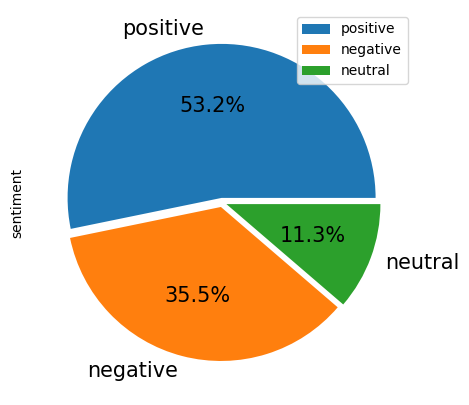

In [362]:
fig,ax = plt.subplots(figsize = (10,5))
tweet_final.sentiment.value_counts().plot(kind = 'pie',autopct='%1.1f%%',explode=[0.03,0.03,0.03],textprops={'fontsize': 15})
ax.legend()

In [363]:
tweet_final.sentiment.value_counts().to_frame()

,sentiment
positive,1065
negative,710
neutral,226


<AxesSubplot:ylabel='sentiment'>

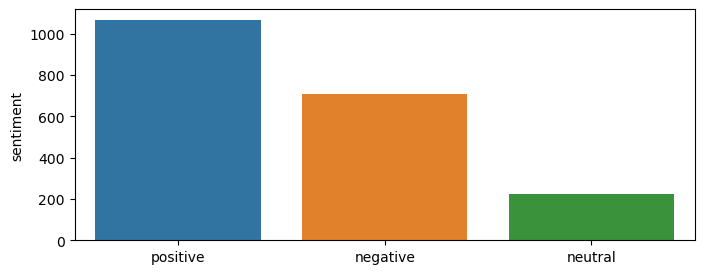

In [364]:
fig,ax = plt.subplots(figsize = (8,3))
sns.barplot(data = tweet_final.sentiment.value_counts().to_frame(), y = tweet_final.sentiment.value_counts().to_frame().sentiment,\
    x =tweet_final.sentiment.value_counts().to_frame().index)

In [365]:
tweet_final['sentiment_encoded'] = tweet_final.sentiment.apply(lambda x: 1 if x == 'positive' else -1 if x == 'negative' else 0)

In [366]:
tweet_final.loc[:, ["tweet_clean(prep)", "sentiment"]][tweet_final.loc[:, ["tweet_clean(prep)", "sentiment"]].sentiment =='negative']['tweet_clean(prep)']

2000    people realise difficult work tinubu governor ...
1996    shade wrong atiku worked life civil servant so...
1999    disaster sea god saved 2 people drowning https...
1998    breaking bakare reacts apc primary defeat say ...
1997    disaster sea god saved 2 people drowning renoa...
                              ...                        
12      discipline always promise deliver never hype c...
13      embarrassment phcnnepa take power governor uzo...
15      allow thought lack creep mind going manifestat...
16      keep opinion people never share others case te...
0       thought certain set people said obasanjo frown...
Name: tweet_clean(prep), Length: 710, dtype: object

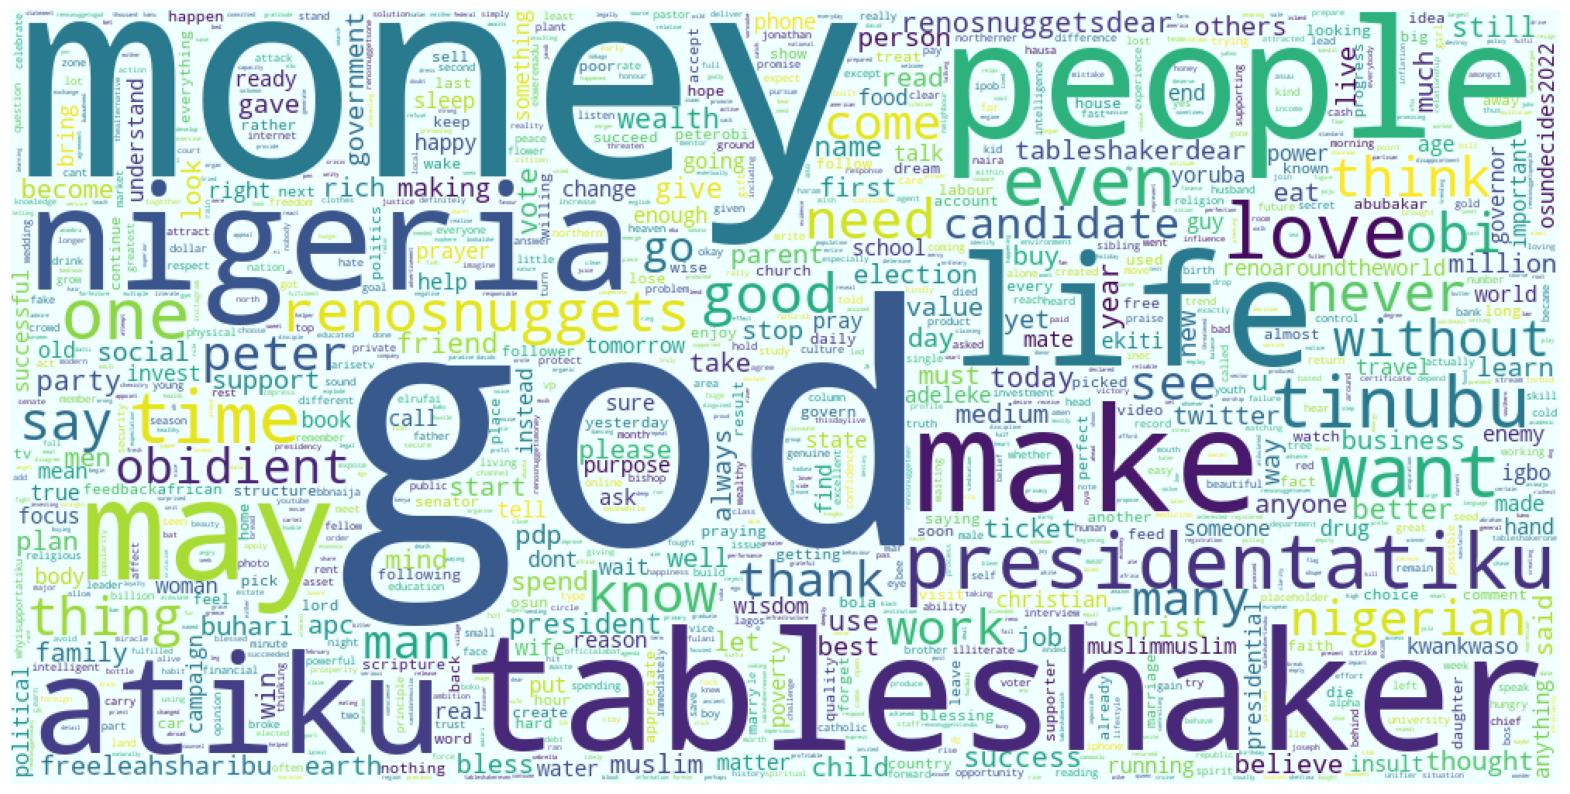

In [378]:
import collections

stopwords = STOPWORDS
stopwords.update(["https", "co","I","The","s"])


text = "".join(tweet_final.loc[:, ["tweet_clean(prep)", "sentiment"]][tweet_final.loc[:, \
    ["tweet_clean(prep)", "sentiment"]].sentiment =='positive']['tweet_clean(prep)'])
fig, ax = plt.subplots(figsize = (20,20))
wc = WordCloud(stopwords=stopwords,max_words = 1500 , width = 1000 , background_color='azure',height = 500,collocations=False).generate(text)
plt.axis("off")
ax.imshow(wc);

In [368]:
filtered_words = [word for word in text.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

In [369]:
popular = pd.DataFrame(counted_words, index =[0]).T.reset_index().rename({"index":"word"},axis =1)\
    .rename({0 :"count"},axis =1).groupby("word").sum().sort_values("count",ascending= False)

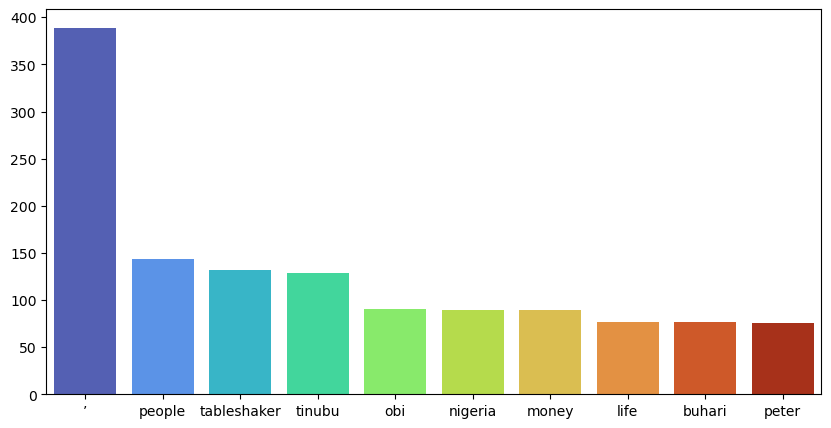

In [377]:
fig,ax =plt.subplots(figsize = (10,5))
sns.barplot(x = words, y = counts, palette= 'turbo')
plt.show()

In [371]:
candidate = []
for i in counted_words:
    if  'peter' in i:
        candidate.append(i)
        

In [372]:
candidate

['peter',
 'peterobi',
 'tableshakerpeter',
 'httpstcobshxtbcekipeter',
 'peterobidatti',
 'httpstcohai6tzopgrpeter',
 'httpstcotbar4g8gpspeterobi',
 'httpstcorzdafg9ccapeter',
 'httpstcof0eof8pjcopeter']

In [373]:
# peterobi_1 = df_cleaned[df_cleaned.tweet.str.contains('peterobi')]
# peterobi_2 = df_cleaned[df_cleaned.tweet.str.contains('obi')]
# peterobi_3 = df_cleaned[df_cleaned.tweet.str.contains('peter obi')]
# peterobi_4 = df_cleaned[df_cleaned.tweet.str.contains('obidient')]

# obi = pd.concat([peterobi_1,peterobi_2,peterobi_3,peterobi_4]).drop_duplicates()
# obi.sentiment.value_counts()


In [374]:
# atiku_1 = df_cleaned[df_cleaned.tweet.str.contains('atiku')]
# atiku_2 = df_cleaned[df_cleaned.tweet.str.contains('atiku abubakar ')]
# atiku = pd.concat([atiku_1,atiku_2]).drop_duplicates()


In [375]:
# bat_1 = df_cleaned[df_cleaned.tweet.str.contains('asiwajubolaahmed')]
# bat_2 = df_cleaned[df_cleaned.tweet.str.contains('tinubu')]
# bat_3 = df_cleaned[df_cleaned.tweet.str.contains('BAT')]
# bat_4 = df_cleaned[df_cleaned.tweet.str.contains('jagaban')]

# bat = pd.concat([peterobi_1,peterobi_2,peterobi_3,peterobi_4]).drop_duplicates()
# bat.shape


In [376]:
inec_1 = df_cleaned[df_cleaned.tweet.str.contains('inec')]
inec_2 = df_cleaned[df_cleaned.tweet.str.contains('inecnigeria')]

inec = pd.concat([inec_1,inec_2]).drop_duplicates()

NameError: name 'df_cleaned' is not defined

In [ ]:
aspirants = pd.concat([obi,atiku,bat,inec]).drop_duplicates()
aspirants[aspirants.tweet.str.contains('tinubu')].sentiment.value_counts()

In [ ]:
aspirants[aspirants.tweet.str.contains('omok')].sentiment.value_counts().plot(kind ='pie')